In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import ccf
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
path = 'data/stock_dfs/'
names = os.listdir(path)

In [3]:
names[0][:-4]

'CSCO'

In [4]:
main_df = pd.DataFrame()
for name in names[:10]:
    add = os.path.join(path, name)
    df = pd.read_csv(add, index_col=0)
    df.rename(columns={'Adj Close': name[:-4]}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how='outer')

In [5]:
corr = main_df.corr()

In [6]:
corr

,CSCO,UAL,TROW,ISRG,NVR,PRGO,TPR,DVN,CE,MRO
CSCO,1.000000,0.679834,0.085459,0.240337,0.354026,0.023018,0.774723,0.833347,0.486680,0.791257
UAL,0.679834,1.000000,0.370488,0.498858,0.765255,0.147067,0.907738,0.922265,0.915604,0.953033
TROW,0.085459,0.370488,1.000000,0.847089,0.733704,0.745040,0.480023,0.391131,0.514771,0.381554
ISRG,0.240337,0.498858,0.847089,1.000000,0.783309,0.642619,0.593495,0.512184,0.643793,0.500706
NVR,0.354026,0.765255,0.733704,0.783309,1.000000,0.522431,0.748813,0.702666,0.822428,0.719086
PRGO,0.023018,0.147067,0.745040,0.642619,0.522431,1.000000,0.256691,0.170803,0.314999,0.146567
TPR,0.774723,0.907738,0.480023,0.593495,0.748813,0.256691,1.000000,0.916745,0.780139,0.907589
DVN,0.833347,0.922265,0.391131,0.512184,0.702666,0.170803,0.916745,1.000000,0.828480,0.987368
CE,0.486680,0.915604,0.514771,0.643793,0.822428,0.314999,0.780139,0.828480,1.000000,0.871367
MRO,0.791257,0.953033,0.381554,0.500706,0.719086,0.146567,0.907589,0.987368,0.871367,1.000000


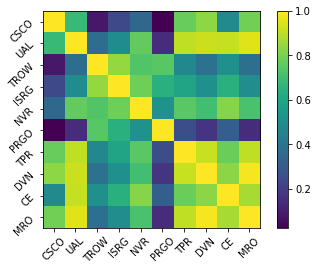

In [8]:
plt.imshow(corr)
plt.colorbar()
plt.xticks(np.arange(len(corr.columns.tolist())),corr.columns, rotation=45);
plt.yticks(np.arange(len(corr.columns.tolist())),corr.columns, rotation=45);

In [10]:
np.argmax(corr.values)

0

In [19]:
MRO = main_df['MRO'].values

In [20]:
DVN = main_df['DVN'].values

In [33]:
UAL = main_df['UAL'].values

In [21]:
cc_MRO_DVN = ccf(MRO, DVN)

In [34]:
cc_MRO_UAL = ccf(MRO, UAL)

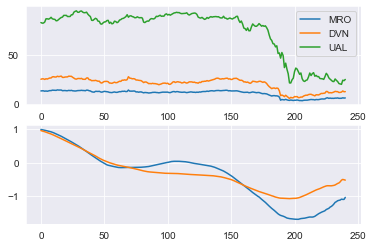

In [35]:
plt.subplot(2,1,1)
plt.plot(MRO)
plt.plot(DVN)
plt.plot(UAL)
plt.legend(['MRO', 'DVN', 'UAL'])
plt.subplot(2,1,2)
plt.plot(cc_MRO_DVN)
plt.plot(cc_MRO_UAL)

In [23]:
cc_MRO_DVN[0]

0.9873678274312172